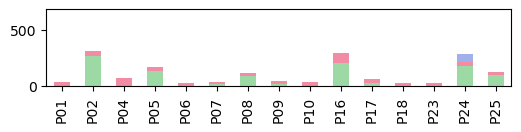

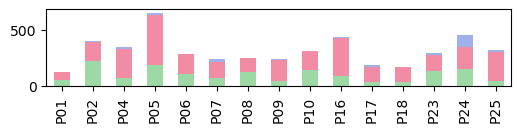

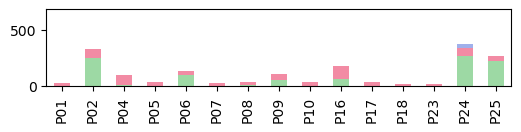

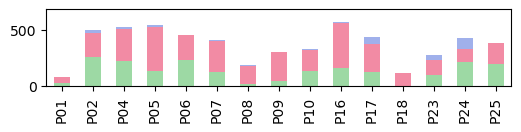

In [6]:
# plots for task cumulative task failures for each participant/trial
import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import itertools

bins = 50

df = pd.DataFrame(columns=['participant', 'trial', 'task', 'task_failure_cumulative'])

for trial, par_data in ia.load_tabularised().has_eyetracking().groupby_trial():
    for par, data in par_data.items():
        intervals = ia.get_all_task_failure_intervals(data)
        for task in ia.TASKS:
            tintervals = intervals[intervals['task'] == task]    
            df.loc[len(df)] = [par, trial, task, (tintervals['t2'] - tintervals['t1']).sum()]
ymax = 0
axes = []
for trial, trial_df in df.groupby('trial'):
    pivot_df = trial_df.pivot(index='participant', columns='task', values='task_failure_cumulative')
    pivot_df = pivot_df[['F', 'S', 'T']] # order for stacking bar chart
    # Plotting
    colors = {task:ia.get_task_properties(task)['color'] for task in df['task'].unique()}
    pivot_df.plot(kind='bar', stacked=True, figsize=(6, 1), color=colors, alpha=0.5, legend=False)
    plt.gca().set_xlabel(None)
    
    ymax = max(plt.gca().get_ylim()[1], ymax)
    axes.append(plt.gca())
    
    #plt.savefig(f'../result/task_failure_cumulative{trial}.png', bbox_inches="tight", dpi=300)
    
for ax in axes:
    ax.set_ylim(0, ymax)

    
    